# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Library

In [278]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import scipy.ndimage.interpolation

from pprint import pprint
from IPython.core import display as ICD

---
# Step 0: Load The Data

In [347]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Load Label Data

In [348]:
str_clean = lambda x: x.replace('b', '').replace("'", "")
label_dict_file = "./signnames.csv"
label_dict = np.loadtxt(open(label_dict_file, 'r'), dtype = np.str, delimiter=',', skiprows=1, unpack=True, )
label_dict = dict( (int(str_clean(x)), str_clean(y)) for x, y in zip(label_dict[0], label_dict[1]) )
label_dict.items()

dict_items([(0, 'Speed limit (20km/h)'), (1, 'Speed limit (30km/h)'), (2, 'Speed limit (50km/h)'), (3, 'Speed limit (60km/h)'), (4, 'Speed limit (70km/h)'), (5, 'Speed limit (80km/h)'), (6, 'End of speed limit (80km/h)'), (7, 'Speed limit (100km/h)'), (8, 'Speed limit (120km/h)'), (9, 'No passing'), (10, 'No passing for vehicles over 3.5 metric tons'), (11, 'Right-of-way at the next intersection'), (12, 'Priority road'), (13, 'Yield'), (14, 'Stop'), (15, 'No vehicles'), (16, 'Vehicles over 3.5 metric tons prohiited'), (17, 'No entry'), (18, 'General caution'), (19, 'Dangerous curve to the left'), (20, 'Dangerous curve to the right'), (21, 'Doule curve'), (22, 'Bumpy road'), (23, 'Slippery road'), (24, 'Road narrows on the right'), (25, 'Road work'), (26, 'Traffic signals'), (27, 'Pedestrians'), (28, 'Children crossing'), (29, 'Bicycles crossing'), (30, 'Beware of ice/snow'), (31, 'Wild animals crossing'), (32, 'End of all speed and passing limits'), (33, 'Turn right ahead'), (34, 'Turn

---

# Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [349]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [323]:
print("Number of validation examples = ", X_valid.shape[0])

Number of validation examples =  4410


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [222]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

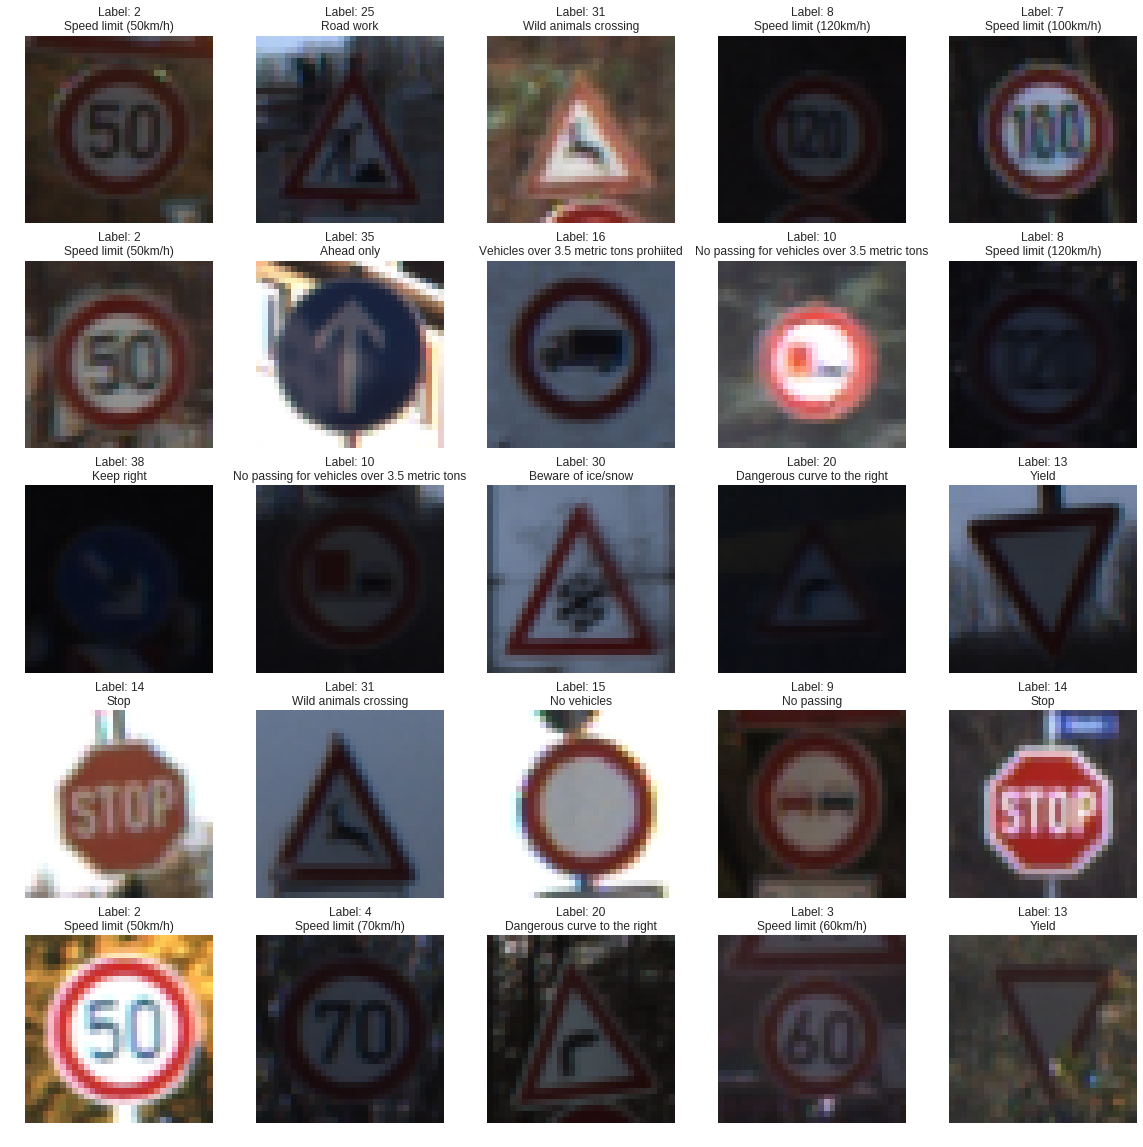

In [223]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
random_choices = np.random.choice(range(n_train), size=25, replace=False)
k = 0
for i in range(5):    
    for j in range(5):
        choice = np.squeeze(X_train[random_choices[k], :, :, :])
        label = y_train[random_choices[k]]

        axes[i, j].imshow(choice)
        axes[i, j].set_title("Label: {}\n{}".format(label, label_dict[label]))    
        axes[i, j].axis('off')
        k += 1
plt.show()

### Data Distribution
The distribution of the image is not uniform.

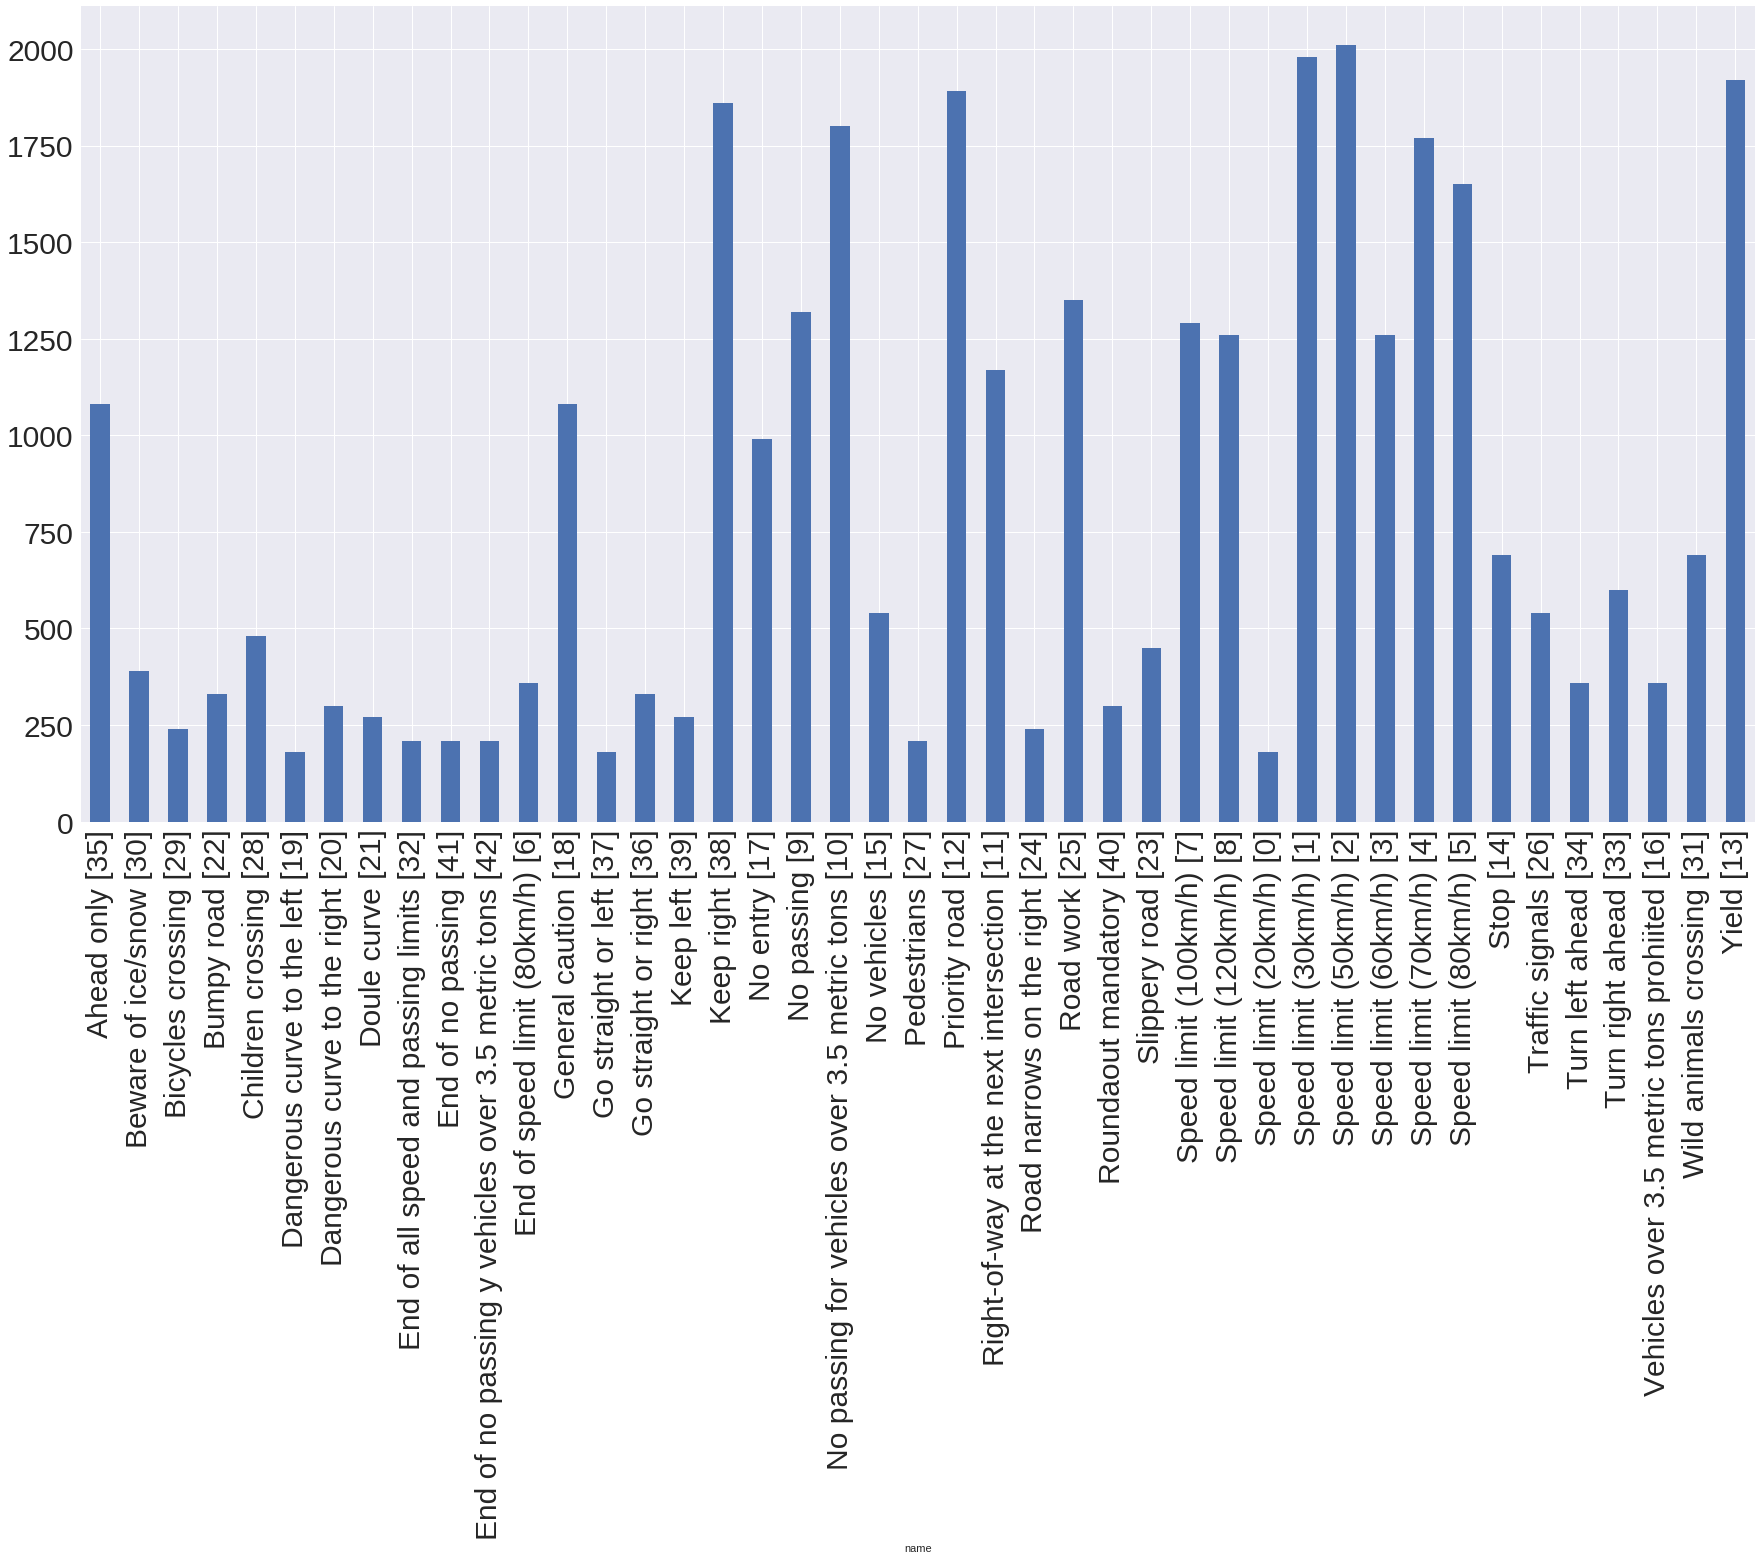

In [224]:
df = pd.DataFrame({'id': y_train})
df['name'] = df.id.map(lambda x: "{} [{}]".format(label_dict[x], x))
df = df.pivot_table(index='name', aggfunc='count')
df.plot(kind='bar', legend=False, figsize=(30, 15), fontsize=30)
plt.show()

The min/max number of example per label is the following:

In [225]:
np.min(df.values), np.max(df.values)

(180, 2010)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [226]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
def min_max_scaler(X, new_min=0, new_max=1):
    """ Resacle Image with a new range
    
    Parameters
    ----------
    X : np.ndarry
        image can be shaped (N, H, W, C) or (H, W, C)
    
    new_min : int
    new_max : int
    
    Returns
    ----------
    image : np.ndarray
        returns rescaled images same shape as X
        
    """
    shape = X.shape
    
    if len(shape) == 4:
        N, H, W, C = shape
        min = np.min(X.reshape(N, -1, C), axis=1).reshape(N, 1, 1 ,C)
        max = np.max(X.reshape(N, -1, C), axis=1).reshape(N, 1, 1, C)
        
    else:
        N = 1
        H, W, C = shape
    
        min = np.min(X.reshape(N, -1, C), axis=1).reshape(1, 1, C)
        max = np.max(X.reshape(N, -1, C), axis=1).reshape(1, 1, C)
    
    return (X - min) * (new_max - new_min) /(max - min) + new_min

def brightness_normalization(X):
    
    shape = X.shape
    
    if len(shape) == 4:
        N, H, W, C = shape
        
        norm = np.sum(np.square(X).reshape(N, -1), 1).reshape(N, 1, 1, 1)
    else:
        N = 1
        H, W, C = shape
        
        norm = np.sum(np.square(X)).reshape(1, 1, 1)
    
    return X / np.sqrt(norm)

# Ended up not using though it works
class ImageNormalizer:
    ''' Mean Normalize Images
    
    Methods
    ----------
    fit(X)
        retrieve mu/sd and returns normalized images
    
    tranform(X)
        returns normalied images
    
    '''
    def __init__(self):
        self.mu = 0
        self.sd = 0
    
    def fit(self, X):
        self.mu = np.mean(X, 0)
        self.sd = np.std(X, 0)
        
        return (X - self.mu) / self.sd
    
    def transform(self, X):
        return (X - self.mu) / self.sd
    
    
def gray_scaler(X):
    ''' Returns Grayscaled image
    
    Note
    ----------
    Returned shape is [batch, width, height, 1].
    '''
    return np.expand_dims(np.dot(X[...,:3], [0.299, 0.587, 0.114]), -1)

In [227]:
# Data Augmentation
def add_noise(X, noise_scale=1):
    return X + np.random.randn(*X.shape) * noise_scale

def rotation(X, rot=3):
    ''' Rotates image
    
    Parameters
    ----------
    rot : int {1, 2, 3}
        1 left - 90
        2 down - 180
        3 right - 90
        
    Returns
    ----------
    img
        roated image
    '''
    return np.rot90(X, k=rot)

def clipped_zoom(img, zoom_factor, **kwargs):
    
    shape = img.shape
    
    if len(shape) == 4:
        n, h, w, c = shape
    
    else:
        n = 1
        h, w, c = shape    
       
    
    img = img.reshape(n, h, w, c)
    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (1,) + (zoom_factor,) * 2 + (1,)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[:, top:top+zh, left:left+zw, :] = scipy.ndimage.zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = scipy.ndimage.zoom(img[:n+1, top:top+zh, left:left+zw, :], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[1] - h) // 2)
        trim_left = ((out.shape[2] - w) // 2)
        out = out[:, trim_top:trim_top+h, trim_left:trim_left+w, :]

    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

/home/kkweon/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:571: RuntimeWarning: invalid value encountered in true_divide
  zoom = (numpy.array(input.shape) - 1) / zoom_div


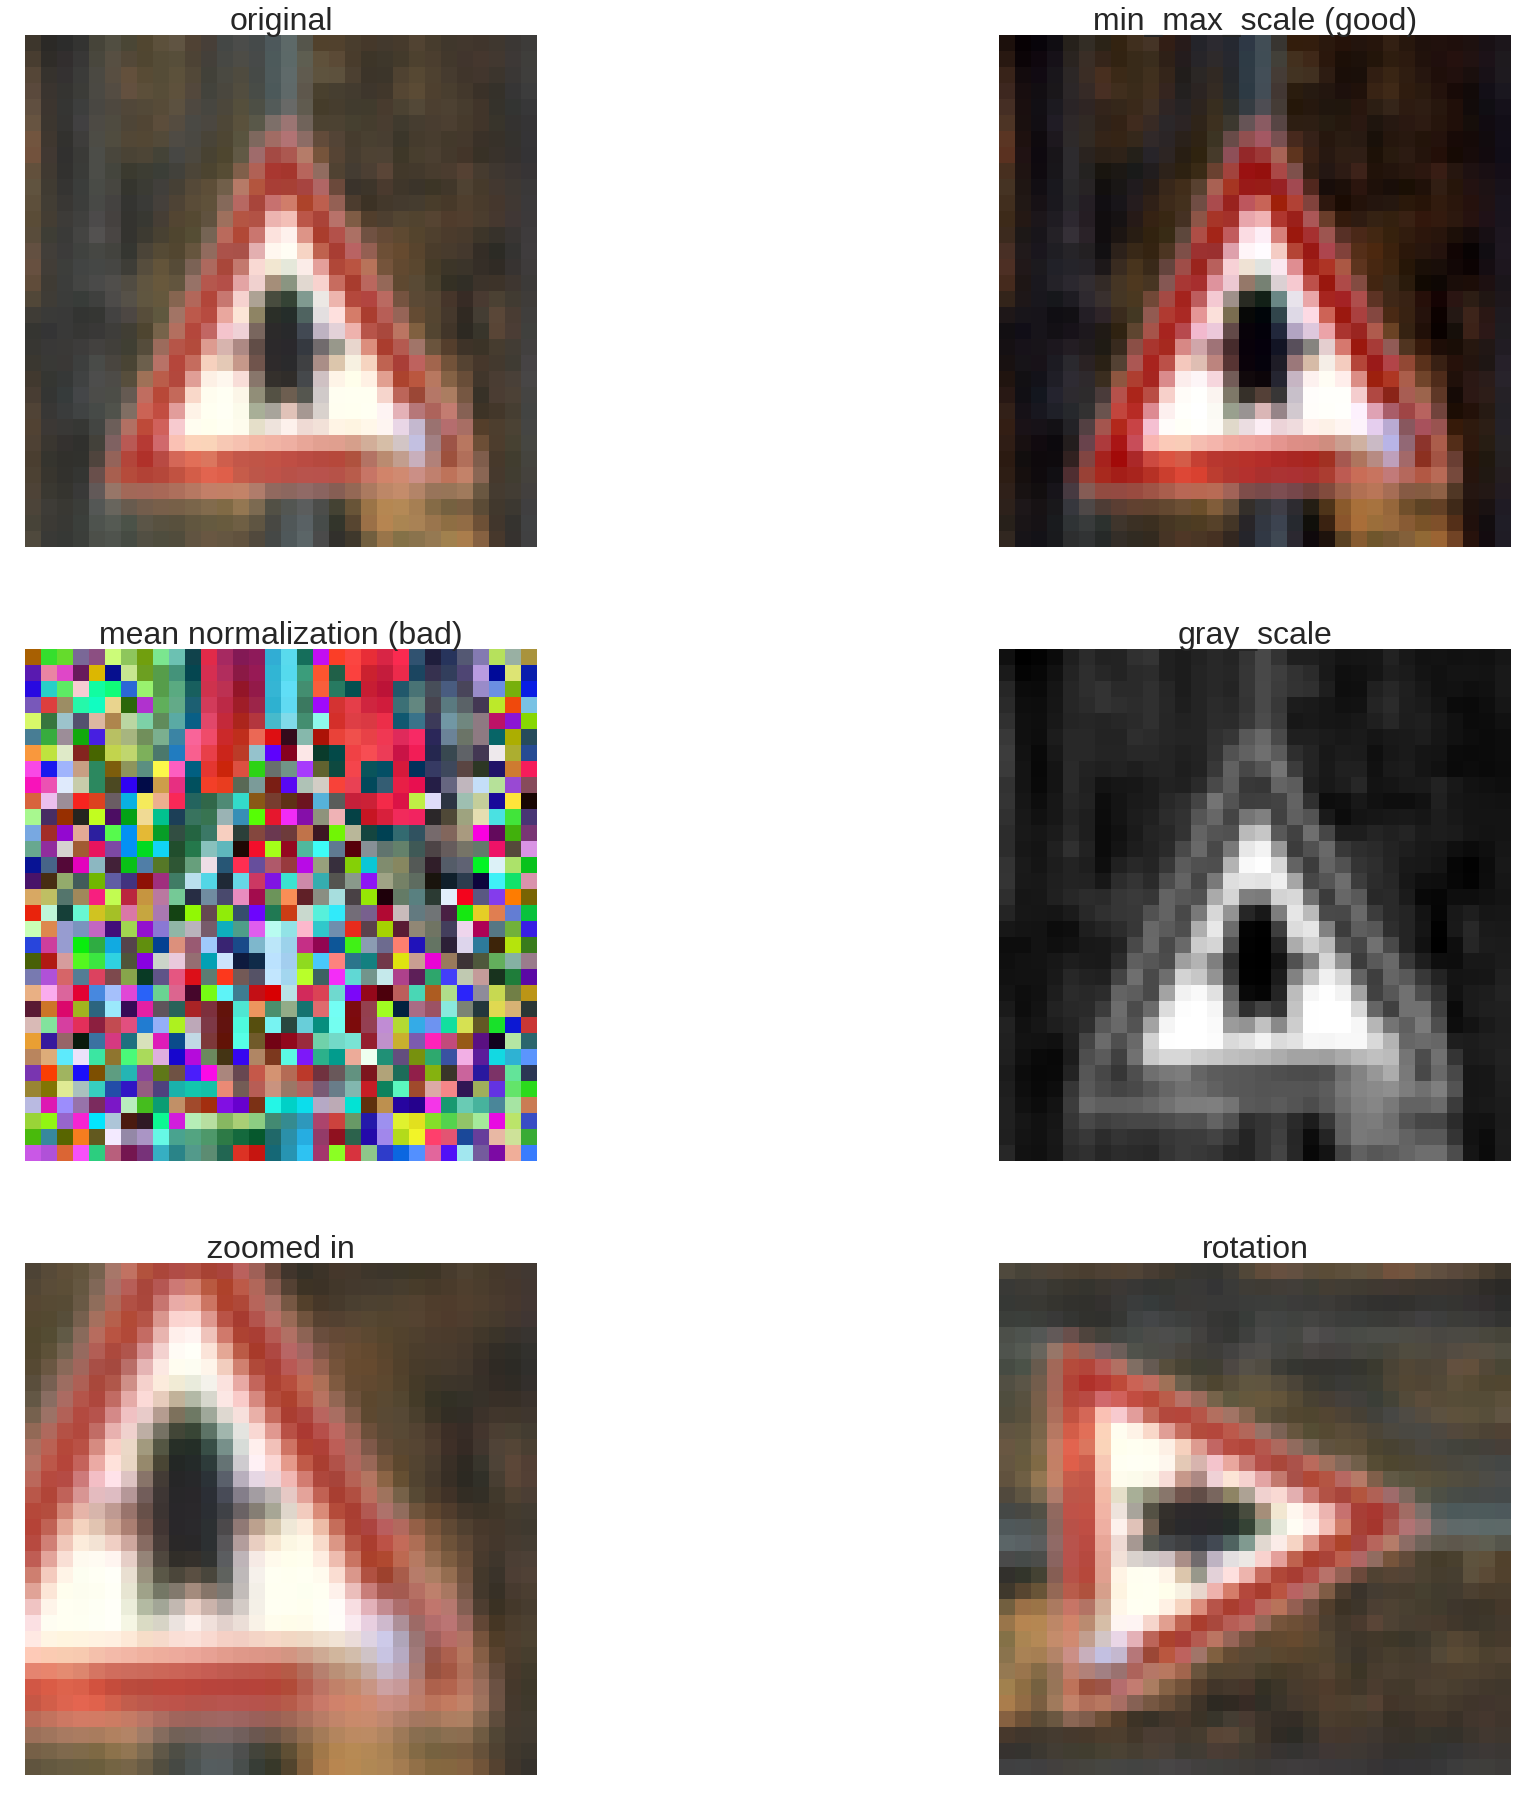

In [228]:
tmp = X_train[8888].reshape(32, 32, 3)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(32, 32))

def plot_ax(img, x, y, title=None, gray=False):
    if len(img.shape) == 4:
        img = np.squeeze(img)
    if not gray:
        axes[x, y].imshow(img)
    else:
        img = np.squeeze(img)
        axes[x, y].imshow(img, cmap='gray')
        
    if title:
        axes[x, y].set_title(title, fontsize=32)        
    axes[x, y].axis('off')

# Row 1
plot_ax(tmp, 0, 0, title='original')
#plot_ax(min_max_scaler(tmp, 0, 1), 0, 1, title='min_max_scale (good)')
plot_ax(min_max_scaler(tmp), 0, 1, title='min_max_scale (good)')

# Row 2
imn = ImageNormalizer()
plot_ax(imn.fit(tmp), 1, 0, title='mean normalization (bad)')
plot_ax(min_max_scaler(gray_scaler(tmp)), 1, 1, title='gray_scale', gray=True)

# Row 3
plot_ax(clipped_zoom(tmp, 1.5), 2, 0, title='zoomed in', gray=True)
plot_ax(rotation(tmp), 2, 1, title='rotation', gray=True)
plt.show()

In [350]:
def data_upsampling(X, y, max_n=2000):
    
    random_zoom = lambda x: clipped_zoom(x, np.random.rand() + 1)
    random_rot = lambda x: rotation(x, rot=np.random.randint(low=1, high=3))
    
    for i in range(n_classes):
        idx = y == i
        target = X[idx]        
        n = target.shape[0]

        while n < max_n:
            action_list = [random_zoom, random_rot]            
            action = np.random.choice(action_list)
            
            img_choice = np.random.choice(range(target.shape[0]))            
            new_img = action(target[img_choice, ...])
            
            X = np.vstack( (X, new_img.reshape(1, *X.shape[1:])) )
            y = np.append(y, i)
            
            n = n + 1
    
    return X, y

tmpX, tmpy = data_upsampling(X_train, y_train, max_n=2000)

/home/kkweon/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
/home/kkweon/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:571: RuntimeWarning: invalid value encountered in true_divide
  zoom = (numpy.array(input.shape) - 1) / zoom_div


Label [2]Speed limit (50km/h)


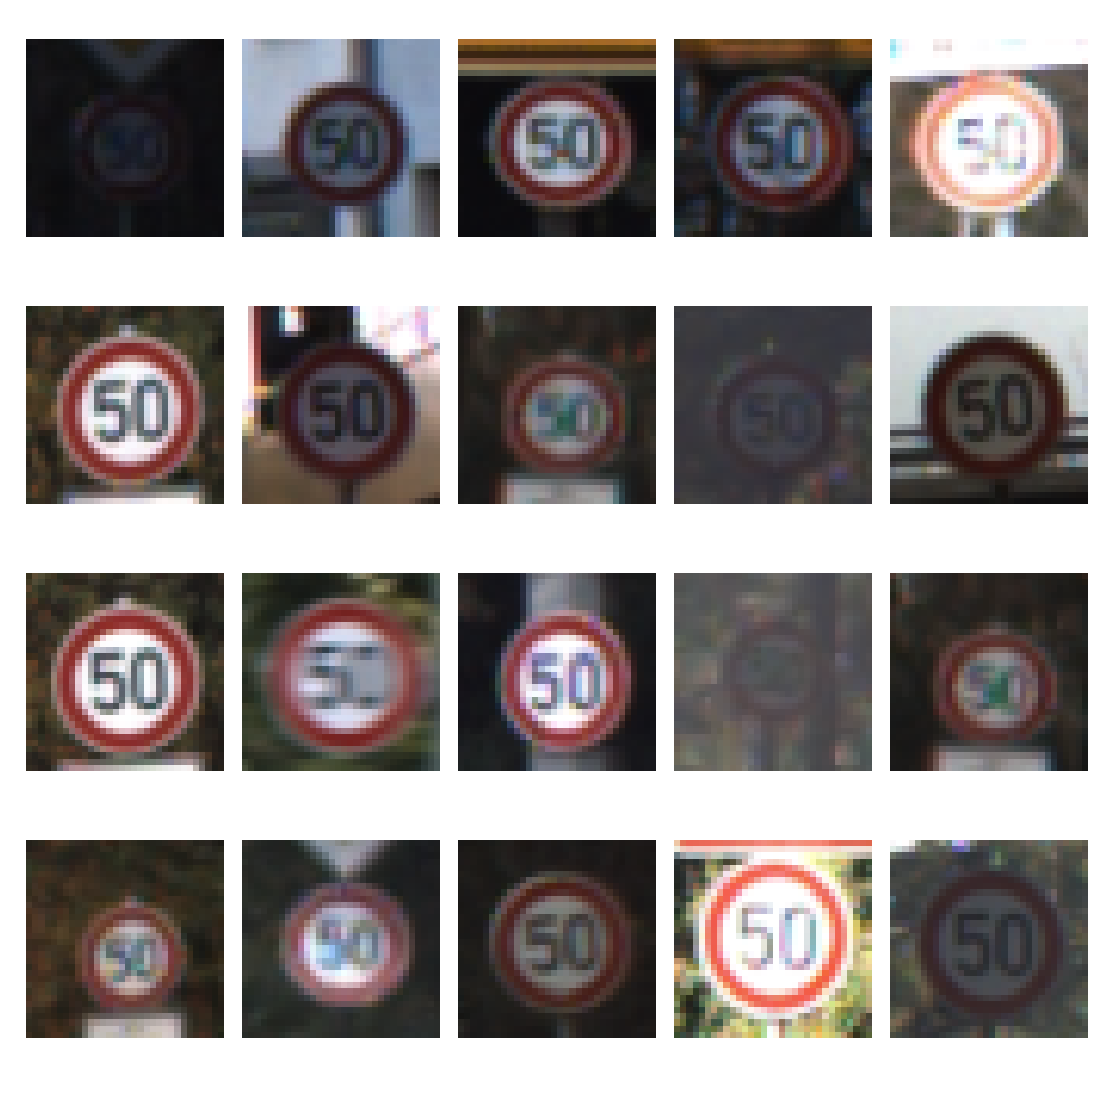

In [340]:
def plot_labels(X, y, n=20, label=0):
    print("Label [{}]{}".format(label, label_dict[label]))
    idx = y == label
    target = X[idx]
    
    sample_idx = np.random.choice(range(target.shape[0]), size=n, replace=False)
    
    target = target[sample_idx]
    
    fig, ax = plt.subplots(4, n//4, sharex=True, figsize=(15, 15))
    
    k = 0
    for i in range(4):
        for j in range(n//4):
            
            ax[i, j].imshow(target[k])
            ax[i, j].axis('off')
            k += 1
    plt.tight_layout(pad=0, )
    

plot_labels(tmpX, tmpy, label=2)

In [356]:
X_train = tmpX
y_train = tmpy

In [357]:
X_train.shape[0]

86010

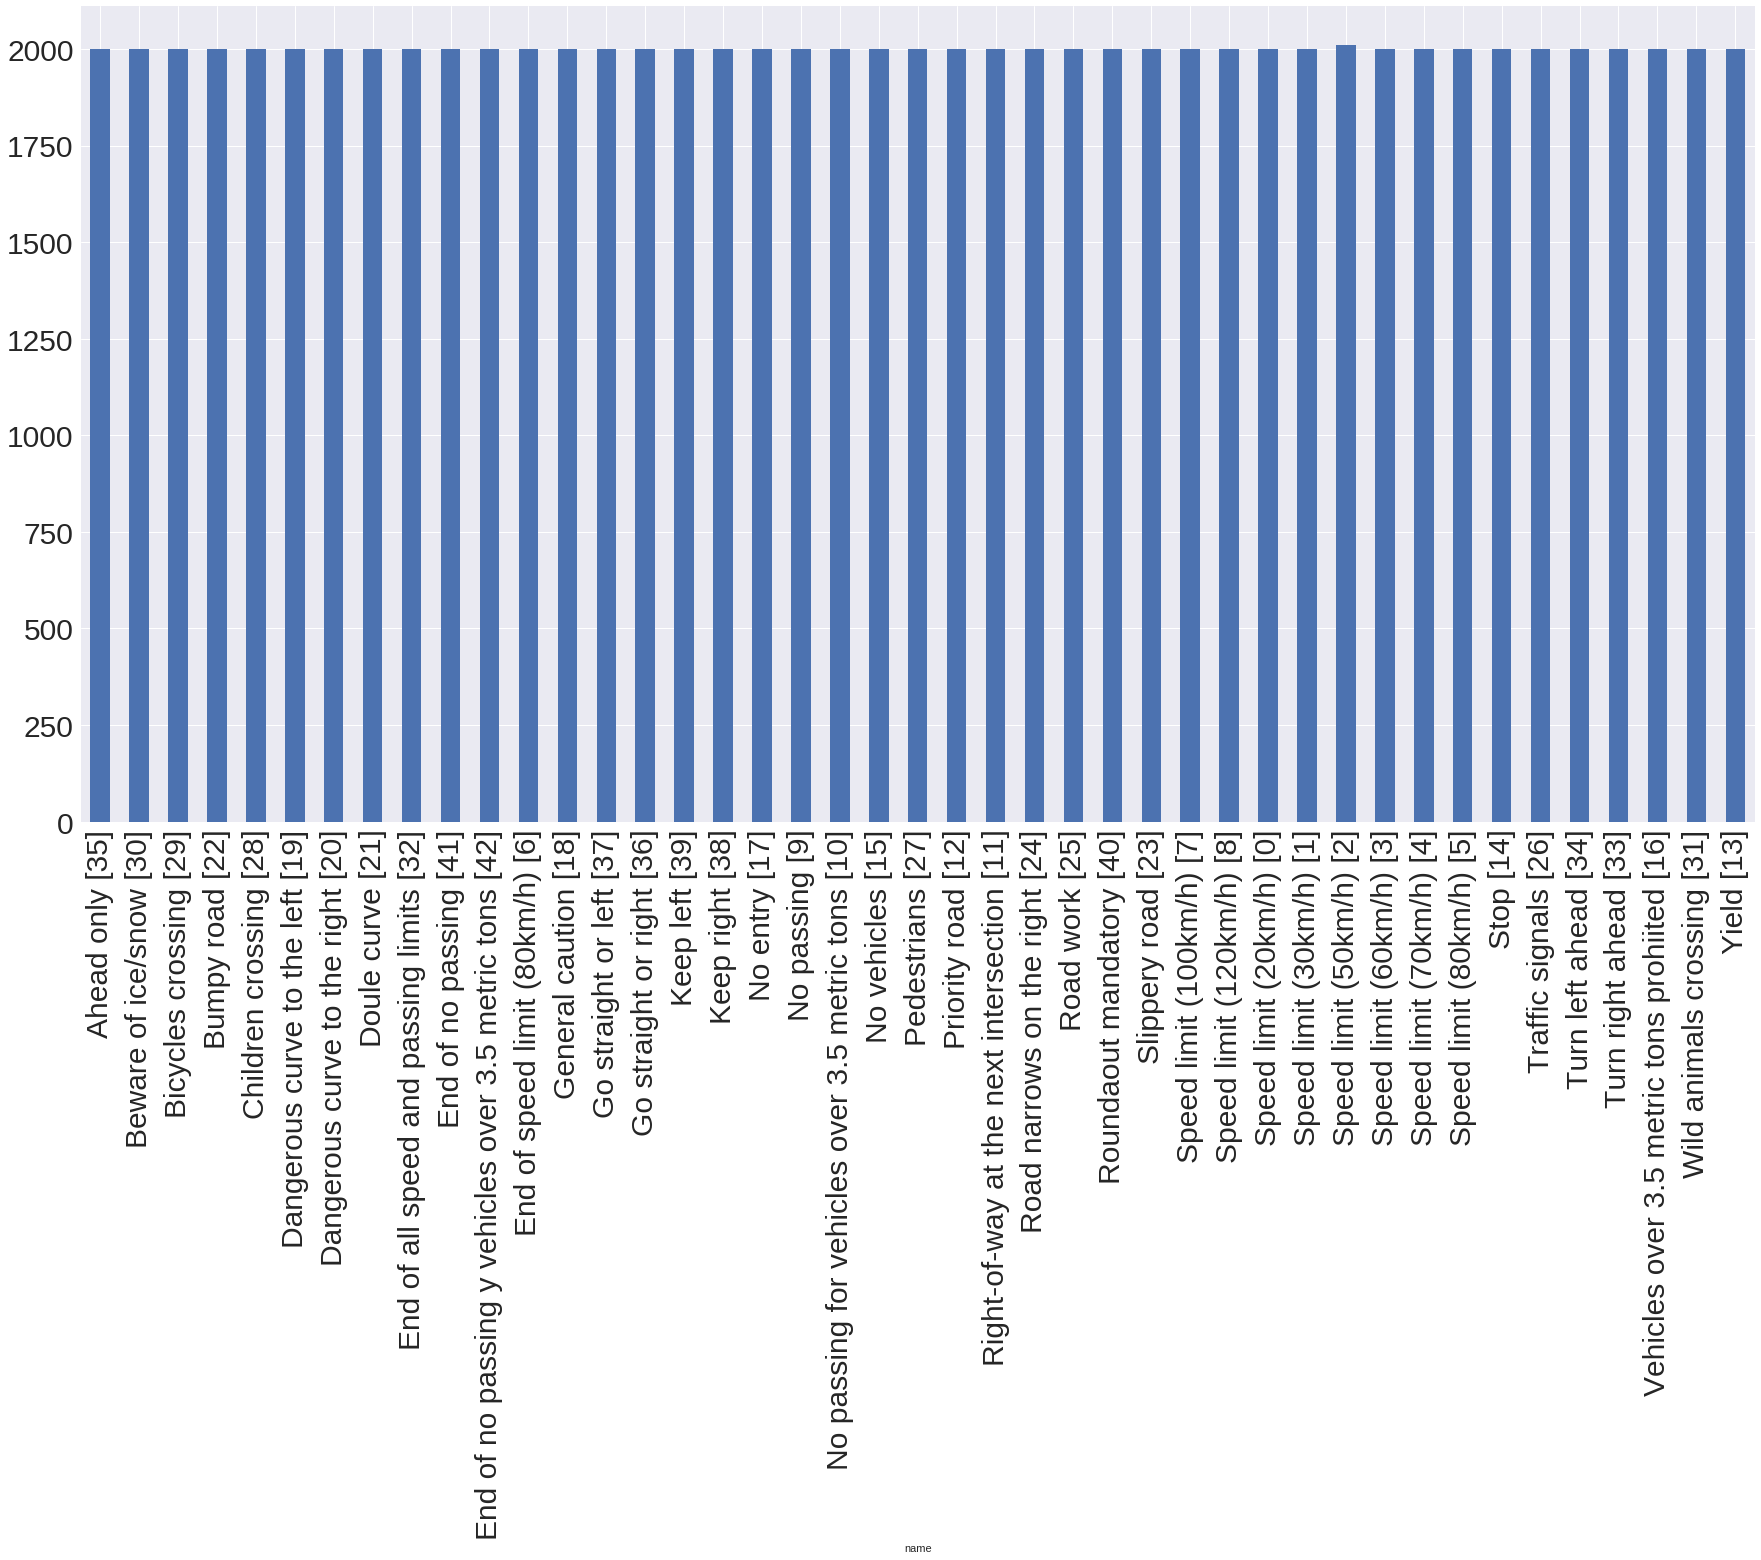

In [142]:
df = pd.DataFrame({'id': y_train})
df['name'] = df.id.map(lambda x: "{} [{}]".format(label_dict[x], x))
df = df.pivot_table(index='name', aggfunc='count')
df.plot(kind='bar', legend=False, figsize=(30, 15), fontsize=30)
plt.show()

Before Normalization


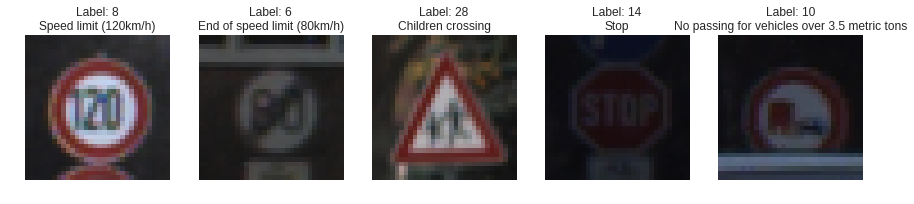

After Min Max Normalization


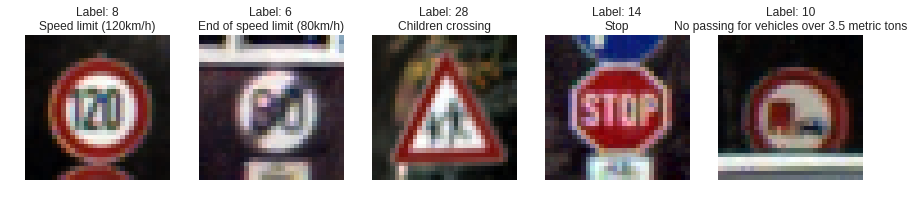

In [125]:
def plot(ax, img, label):
    ''' Plot image
    '''
    ax.imshow(choice)
    ax.set_title("Label: {}\n{}".format(label, label_dict[label]))    
    ax.axis('off')

random_choices = np.random.choice(range(n_train), size=10, replace=False)

fig_options = {
    'ncols': 5,
    'figsize': (15, 15)
}

print("Before Normalization")

fig, axes = plt.subplots(**fig_options)
for i in range(5):    
    choice = np.squeeze(X_train[random_choices[i], :, :, :])
    label = y_train[random_choices[i]]       
    plot(axes[i], choice, label)
plt.show()

print("After Min Max Normalization")

fig, axes = plt.subplots(**fig_options)
for i in range(5):    
    choice = np.squeeze(X_train[random_choices[i], :, :, :])
    choice = min_max_scaler(brightness_normalization(choice))
    label = y_train[random_choices[i]]        
    plot(axes[i], choice, label)
plt.show()

### Model Architecture

In [161]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

class LeNet5:
    """ Model Class to be used with Solver class
    
    TODO: Currently, it's more like VGG net but leave it as of now.
    
    Attributes
    ----------
    input : tf.placeholder
            Input Image Placeholder, shape=(None, 32, 32, 3)
            
    y : tf.placeholder
        True Label Placeholder, shape=(None)
        
    loss : tf.placeholder            
    
    softmax : tf.placeholder
    
    y_pred : tf.placeholder
    
    
    
    Examples
    ----------
    >>> lenet = LeNet([128, 32, 32, 3], 43)
    >>> sess = tf.InteractiveSession()    
    >>> solver = Solver(sess, lenet)  
    """
    
    
    def __init__(self, input_shape, output_dim, use_batchnorm=True, decay=.9, l2reg=0.001):
        """ Constructor
        
        Parameters
        ----------
        input_shape : tuple
                      (batchsize, height, width, channels)
                      
        output_dim : int
                     number of classes
                     
        use_batchnorm : bool, optional
                        if true: use batchnorm
                        
        decay : float, optional
                batchnorm moving average decay
        """
        assert len(input_shape) == 4, "Input_shape: {}".format(input_shape)
        
        self.input = None
        self.y = None
        self.use_batchnorm = use_batchnorm
        self.keep_prob = None
        self.l2reg = l2reg
        # private
        self.activations = []
        self._create_graph(input_shape, output_dim, decay=decay)
        
        
        
    def _create_graph(self, input_shape, output_dim, decay=.9):
        """ TF Graph Model """
        
        # Saniy Check
        assert input_shape[:-1] == [None, 32, 32], input_shape
        
        # Placeholder defined here
        self.input = tf.placeholder(tf.float32, shape=input_shape, name='X')
        self.y = tf.placeholder(tf.int32, shape=input_shape[0], name='y')
        y_one_hot = tf.one_hot(self.y, depth = output_dim)
        self.is_training = tf.placeholder(tf.bool, name='train_mode')
        self.keep_prob = tf.placeholder(tf.float32, name='keep_prob')
        
        # To be used with batchnorm
        batch_norm_options = {
            'is_training': self.is_training,
            'decay': decay,
            'zero_debias_moving_mean': True,
            'updates_collections': None
        }
        
        def conv2d(x, outdim, shape, padding='SAME', activation_fn=tf.nn.relu, batchnorm=True, l2reg=self.l2reg):            
            net = tf.contrib.layers.conv2d(x, outdim, shape, padding=padding, activation_fn=None, weights_regularizer=tf.contrib.layers.l2_regularizer(l2reg))
            if batchnorm:
                net = tf.contrib.layers.batch_norm(net, **batch_norm_options)
            net = activation_fn(net, name='activation')
            
            self.activations.append(net)
            return net
        
        def maxpool2d(x, shape=(2, 2), stride=2):
            return tf.contrib.layers.max_pool2d(x, shape, stride)
        
        def dense(x, hidden_dim, activation_fn=tf.nn.relu, batchnorm=True, dropout=True, l2reg=self.l2reg):
            net = tf.contrib.layers.fully_connected(x, hidden_dim, activation_fn=None, weights_regularizer=tf.contrib.layers.l2_regularizer(l2reg))
            if batchnorm:
                net = tf.contrib.layers.batch_norm(net, **batch_norm_options)
            if activation_fn is not None:
                net = activation_fn(net, name='activation')
            if dropout:
                net = tf.contrib.layers.dropout(net, keep_prob=self.keep_prob)
            self.activations.append(net)
            return net
        
        with tf.variable_scope('layer1'):
            with tf.variable_scope('first'):
                net = conv2d(self.input, 64, (3, 3), batchnorm=self.use_batchnorm)    
            with tf.variable_scope('second'):
                net = conv2d(self.input, 64, (3, 3), batchnorm=self.use_batchnorm)    
            net = maxpool2d(net)
                        
        with tf.variable_scope('layer2'):
            with tf.variable_scope('first'):
                net = conv2d(net, 128, (3, 3), batchnorm=self.use_batchnorm)
            with tf.variable_scope('second'):
                net = conv2d(net, 128, (3, 3), batchnorm=self.use_batchnorm)
            net = maxpool2d(net)
        
        with tf.variable_scope('layer3'):
            with tf.variable_scope('first'):
                net = conv2d(net, 256, (3, 3), batchnorm=self.use_batchnorm)
            with tf.variable_scope('second'):
                net = conv2d(net, 256, (3, 3), batchnorm=self.use_batchnorm)
            net = maxpool2d(net)
        
        with tf.variable_scope('layer4'):
            with tf.variable_scope('first'):
                net = conv2d(net, 512, (3, 3), batchnorm=self.use_batchnorm)
            with tf.variable_scope('second'):
                net = conv2d(net, 512, (3, 3), batchnorm=self.use_batchnorm)
            net = maxpool2d(net)       
            
        with tf.variable_scope('layer5'):
            net = tf.contrib.layers.flatten(net)
            net = dense(net, 1024)
            
        with tf.variable_scope('layer6'):
            net = dense(net, 1024)            
                        
        with tf.variable_scope('layer7'):
            net = dense(net, output_dim, activation_fn=None, dropout=False, batchnorm=False)
            
        # Loss
        loss = tf.nn.softmax_cross_entropy_with_logits(logits=net, labels=y_one_hot)
        self.loss = tf.reduce_mean(loss)
        
        # Softmax -> Equal -> Accuracy
        self.softmax = tf.nn.softmax(net)
        self.y_pred = tf.argmax(self.softmax, axis=1)
        y_true = tf.argmax(y_one_hot, axis=1)        
        equal = tf.equal(self.y_pred, y_true)
        self.acc = tf.reduce_mean(tf.cast(equal, tf.float32))

# Not used but leave it here for future reference
# it performed better on a test set, but took so long to train.
class InceptionNet:
    '''
    Google mini Inception v1 Model    
    
    '''
    
    def __init__(self, input_shape, output_dim, use_batchnorm=True, decay=.9):
        """ Constructor

        Parameters
        ----------
        input_shape : tuple
                  (batchsize, height, width, channels)

        output_dim : int
                 number of classes

        use_batchnorm : bool, optional
                    if true: use batchnorm

        decay : float, optional
            batchnorm moving average decay
        """
        assert len(input_shape) == 4, "Input_shape: {}".format(input_shape)

        self.input = None
        self.y = None
        self.use_batchnorm = use_batchnorm

        # private
        self.activations = []
        self._create_graph(input_shape, output_dim, decay=decay)        

        
    def _create_graph(self, input_shape, output_dim, decay=.9):
        """ TF Graph Model """

        # Saniy Check
        assert input_shape[:-1] == [None, 32, 32], input_shape

        # Placeholder defined here
        self.input = tf.placeholder(tf.float32, shape=input_shape, name='X')
        
        self.y = tf.placeholder(tf.int32, shape=input_shape[0], name='y')
        y_one_hot = tf.one_hot(self.y, depth = output_dim)
        
        self.is_training = tf.placeholder(tf.bool, name='train_mode')
        self.keep_prob = tf.placeholder(tf.float32, name='dropout_p')

        # To be used with batchnorm
        batch_norm_options = {
            'is_training': self.is_training,
            'decay': decay,
            'zero_debias_moving_mean': True,
            'updates_collections': None
        }
        def conv2d(x, shape, output, stride=1, l2reg=tf.contrib.layers.l2_regularizer(0.001), activation=tf.nn.relu, padding='SAME', batchnorm=True, scope='layer'):
            if batchnorm:
                net = tf.contrib.layers.conv2d(x, output, shape, stride=stride, padding=padding, activation_fn=None, weights_regularizer=l2reg)
                net = tf.contrib.layers.batch_norm(net, **batch_norm_options)
                return tf.nn.relu(net)                
            else:
                return tf.contrib.layers.conv2d(x, output, shape, stride=stride, padding=padding, activation_fn=activation, weights_regularizer=l2reg)
        
        def pool2d(x, shape, stride, padding='SAME'):            
            return tf.contrib.layers.max_pool2d(x, shape, stride, padding=padding)
        
        def inception_module(input, scope, batchnorm=True):            
            with tf.variable_scope(scope):
                # 1x1   
                net_1 = conv2d(input, (1, 1), 64, batchnorm=batchnorm)
                
                # 3x3 reduce
                net_2 = conv2d(input, (1, 1), 96, batchnorm=batchnorm)
                net_2 = conv2d(net_2, (3, 3), 128, batchnorm=batchnorm)
                
                # 5x5 rduce
                net_3 = conv2d(input, (1, 1), 16, batchnorm=batchnorm)
                net_3 = conv2d(net_3, (5, 5), 32, batchnorm=batchnorm)
                
                # 3x3 pool
                net_4 = pool2d(input, (3, 3), stride=1)
                net_4 = conv2d(net_4, (1, 1), 32, batchnorm=batchnorm)
                
                return tf.concat([net_1, net_2, net_3, net_4], axis=-1)                
        
        net = conv2d(self.input, (7, 7), 64, stride=2, batchnorm=self.use_batchnorm)
        net = pool2d(net, (3, 3), 2)
        net = conv2d(net, (3, 3), 192, batchnorm=self.use_batchnorm)
        net = pool2d(net, (3, 3), 2)
        with tf.variable_scope('layer1') as scope:            
            net = inception_module(self.input, scope, batchnorm=self.use_batchnorm)
            net = tf.contrib.layers.max_pool2d(net, (3, 3), 2)
                        
        with tf.variable_scope('layer2') as scope:
            net = inception_module(self.input, scope, batchnorm=self.use_batchnorm)
            net = pool2d(net, (3, 3), 2)
        
        with tf.variable_scope('flatten') as scope:            
            net = tf.contrib.layers.flatten(net)
            net = tf.contrib.layers.fully_connected(net, 256, activation_fn=None)
            if self.use_batchnorm:
                net = tf.contrib.layers.batch_norm(net, **batch_norm_options)
            net = tf.nn.relu(net)
            net = tf.nn.dropout(net, keep_prob=self.keep_prob) 
            
        with tf.variable_scope('fc1') as scope:
            net = tf.contrib.layers.fully_connected(net, output_dim, activation_fn=None)
            self.activations.append(net)
            
        # Loss
        loss = tf.nn.softmax_cross_entropy_with_logits(logits=net, labels=y_one_hot)
        self.loss = tf.reduce_mean(loss)
        
        # Softmax -> Equal -> Accuracy
        self.softmax = tf.nn.softmax(net)
        self.y_pred = tf.argmax(self.softmax, axis=1)
        y_true = tf.argmax(y_one_hot, axis=1)        
        equal = tf.equal(self.y_pred, y_true)
        self.acc = tf.reduce_mean(tf.cast(equal, tf.float32))

class Solver:
    ''' Solver class to be used with the model class 
    
    Attributes
    ----------
    sess : tf.Session
        Tensorflow Session
    
    model : Model Class
        See Above for implementation        
    
    Methods
    ----------
    fit(X, y)
        runs one train step
        
    acc(X, y)
        returns accuracy
        
    loss(X, y)
        returns loss
        
    predict(X)
        returns predicted labels
        
    predict_top_k(X, k)
        returns top k predicted labels
        
    Examples
    ----------
    >>> model = LeNet5(...)
    >>> with tf.Session as sess:
    >>>     solver = Solver(sess, model)
    >>>     solver.fit(X, y)
    '''
    
    
    
    def __init__(self, sess, model, lr=0.01, dropout=None):
        '''        
        Parameters
        ----------
        sess : tf.Session
            Tensorflow session
               
        model : model class
            see above for implementation
                
        lr : float, optional
            learning rate
        '''
        self.sess = sess
        self.model = model
        self.optim = tf.train.AdamOptimizer(lr)
        self.train_op = self.optim.minimize(model.loss)
        self.dropout = dropout
        
    def _prepare_feed_dict(self, X, y, train = True):
        ''' Create a feed_dict dictionary '''
        feed = {
            self.model.input: X,
            self.model.y: y,
            self.model.is_training: train
        }
        if self.dropout and train:
            feed[self.model.keep_prob] = self.dropout
        elif self.dropout and not train:
            feed[self.model.keep_prob] = 1.0
            
        return feed
    
    def fit(self, X, y, train = True):
        ''' Train Step and returns a loss'''

        feed = self._prepare_feed_dict(X, y, train)
        _, loss = self.sess.run([self.train_op, self.model.loss], feed_dict=feed)
        return loss
    
    def acc(self, X, y, train = True):
        ''' Returns the accuracy'''
        feed = self._prepare_feed_dict(X, y, train)
        return self.sess.run(self.model.acc, feed_dict=feed)
    
    def loss(self, X, y, train = True):
        ''' Returns the loss '''
        feed = self._prepare_feed_dict(X, y, train)
        return self.sess.run(self.model.loss, feed_dict=feed)
    
    def predict(self, X, train = False):
        ''' Returns the softmax probability '''
        feed = self._prepare_feed_dict(X, [], train)
        del feed[self.model.y]        
        return self.sess.run(self.model.y_pred, feed_dict=feed)
    
    def predict_top_k(self, X, k = 1, train = False):
        ''' Returns the top k softmax probability '''
        feed = self._prepare_feed_dict(X, [], train)
        del feed[self.model.y]        
        return self.sess.run(tf.nn.top_k(self.model.softmax, k=k), feed_dict=feed)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Helper methods such as batch generators and evaluations are defined here

In [162]:
def generator(X, y, batch_size):
    ''' Yield one batch
    
    Parameters
    ----------
    X : np.ndarray
        Train data shaped (N, H, W, C)
    
    y : np.array
        True Label Array
   
    batch_size : int
        batch size
    
    Returns
    ----------
    X_batch : np.ndarray
        Train Batch shaped (batch_size, H, W, C)
   
    y_batch : np.array
        True Label Batch shaped (batch_size)
    '''
    def fill():
        n = X.shape[0]
        return list(np.random.choice(range(n), size=n, replace=False))
    
    idx = fill()
    while True:
        if len(idx) < batch_size:
            idx = fill()
            
        batch_choice = [idx.pop() for i in range(batch_size)]
        assert len(batch_choice) == batch_size
        
        X_batch = X[batch_choice]
        y_batch = y[batch_choice]
        
        assert X_batch.shape == (batch_size, *X.shape[1:])
        assert y_batch.shape == (batch_size, )
        
        if len(X_batch.shape) == 3:
            X_batch = np.expand_dims(X_batch, -1)
            
        yield X_batch, y_batch
        
def evaluation(solver, X, y, batch_size, train=False):
    ''' Evaluate a dataset using batch size
    
    Parameters
    ----------
    solver : Solver Class
    X : np.ndarray
    y : np.array
    batch_size : int
    train : bool, optional
    
    Returns
    ----------
    loss : float
        loss of model over the whole dataset
        
    acc : float
        accuracy of model over the whole dataset
    '''
    n = X.shape[0]
    
    total_loss = 0
    total_acc = 0
    
    for batch_idx in range(0, n, batch_size):
        idx_beg = batch_idx
        idx_end = batch_idx + batch_size
        
        X_batch = X[idx_beg:idx_end]
        y_batch = y[idx_beg:idx_end]
        
        acc = solver.acc(X_batch, y_batch, train) * X_batch.shape[0]
        loss = solver.loss(X_batch, y_batch, train) * X_batch.shape[0]
    
        total_loss += loss
        total_acc += acc
        
    return total_loss / n, total_acc / n

# Actual Train Step

In [165]:
# Hyper Parameters
batch_size = 256
lr = 0.01
epoch = 500
l2reg = 0.0001
decay = 0.995
use_batchnorm=True
print_n = 10

# Image Processing Pipeline
scaler_pipeline = lambda x: min_max_scaler(x)
train_scaler = lambda x: scaler_pipeline(x)
test_scaler = lambda x: scaler_pipeline(x)

# Log Message per Epoch
MSG_STATUS = "[Epoch: {:>4}] [Train] Loss: {:>6.5f} Acc: {:>5.2%} [Val] Loss: {:>6.5f} Acc: {:>5.2%}"

input_shape = list(train_scaler(X_train).shape[1:])
if len(input_shape) == 2:
    input_shape.append(1)
input_shape = [None] + input_shape
output_dim = n_classes
print("Input.shape: {} Output.dim: {}".format(input_shape, output_dim))

# Model/Solver Instance
tf.reset_default_graph()
sess = tf.InteractiveSession()
lenet = LeNet5(input_shape, output_dim, use_batchnorm, decay, l2reg)
solver = Solver(sess, lenet, lr=lr, dropout=0.5)
#inception = InceptionNet(input_shape, output_dim, use_batchnorm=True)

# Session Begin
saver = tf.train.Saver()
init = tf.global_variables_initializer()
sess.run(init)

batch_helper = generator(train_scaler(X_train), y_train, batch_size)

Input.shape: [None, 32, 32, 3] Output.dim: 43


In [166]:
best_val_loss = 999

for epoch in range(epoch):
    iterations = int(np.ceil(n_train // batch_size))
    for i in range(iterations):
        X_tmp, y_tmp = next(batch_helper)
        assert len(X_tmp.shape) == 4, X_tmp.shape

        loss = solver.fit(X_tmp, y_tmp, True)
        print("LOSS: {:10.5f}".format(loss), end='\r')

    t_loss, t_acc = evaluation(solver, test_scaler(X_train), y_train, batch_size, False)
    v_loss, v_acc = evaluation(solver, test_scaler(X_valid), y_valid, batch_size, False)
    
    if v_loss < best_val_loss:
        best_val_loss = v_loss
        
        if epoch > 10:
            saver.save(sess, 'best-model')        
    
    if epoch % print_n == 0:
        print(MSG_STATUS.format(epoch+1, t_loss, t_acc, v_loss, v_acc))

[Epoch:    1] [Train] Loss: 1249.01984 Acc: 2.33% [Val] Loss: 1323.96334 Acc: 0.68%
[Epoch:   11] [Train] Loss: 0.17836 Acc: 95.65% [Val] Loss: 0.38281 Acc: 92.81%
[Epoch:   21] [Train] Loss: 0.06580 Acc: 98.21% [Val] Loss: 0.19180 Acc: 96.01%
[Epoch:   31] [Train] Loss: 0.07961 Acc: 97.92% [Val] Loss: 0.33405 Acc: 94.47%
[Epoch:   41] [Train] Loss: 0.02903 Acc: 99.21% [Val] Loss: 0.23899 Acc: 96.28%
[Epoch:   51] [Train] Loss: 0.19991 Acc: 94.92% [Val] Loss: 0.28229 Acc: 93.17%
[Epoch:   61] [Train] Loss: 0.01517 Acc: 99.58% [Val] Loss: 0.11914 Acc: 97.12%
[Epoch:   71] [Train] Loss: 0.01287 Acc: 99.63% [Val] Loss: 0.11773 Acc: 97.51%
[Epoch:   81] [Train] Loss: 0.03275 Acc: 99.35% [Val] Loss: 0.13289 Acc: 97.44%
[Epoch:   91] [Train] Loss: 0.00641 Acc: 99.86% [Val] Loss: 0.09851 Acc: 97.53%
[Epoch:  101] [Train] Loss: 0.01371 Acc: 99.65% [Val] Loss: 0.15921 Acc: 97.57%
[Epoch:  111] [Train] Loss: 0.05822 Acc: 98.78% [Val] Loss: 0.15712 Acc: 96.64%
[Epoch:  121] [Train] Loss: 0.01229 

In [167]:
saver = tf.train.import_meta_graph('best-model.meta')
saver.restore(sess, tf.train.latest_checkpoint('./'))

solver.sess = sess
test_loss, test_acc = evaluation(solver, test_scaler(X_test), y_test, batch_size, False)
print("Test Loss: {:>10.5f}".format(test_loss))
print("Test Acc: {:>10.2%}".format(test_acc))

Test Loss:    0.15470
Test Acc:     98.01%


In [186]:
val_loss, val_acc = evaluation(solver, test_scaler(X_valid), y_valid, batch_size, False)
print("Valid Loss: {:>10.5f}".format(val_loss))
print("Valid Acc: {:>10.2%}".format(val_acc))

Valid Loss:    0.03842
Valid Acc:     99.07%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

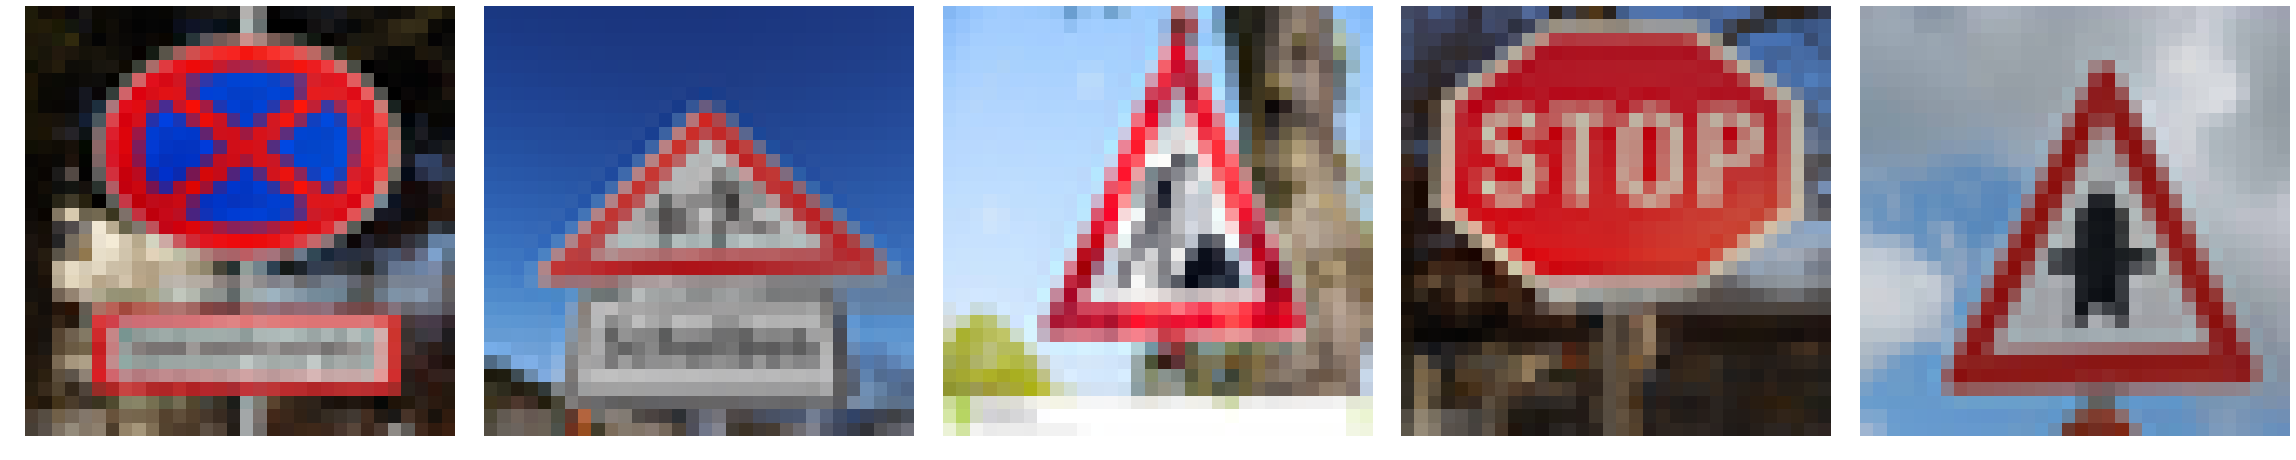

In [168]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from PIL import Image

file_names = [os.path.join('data', x) for x in os.listdir('data/') if '.jpg' in x]
file_names = sorted(file_names)

fig, ax = plt.subplots(ncols=5, figsize=(32, 32))
test_images = []
for i, f in enumerate(file_names):    
    img = Image.open(f)
    img = img.resize((32, 32), Image.ANTIALIAS)
    test_images.append(img)    
    ax[i].imshow(img)
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

### Predict the Sign Type for Each Image

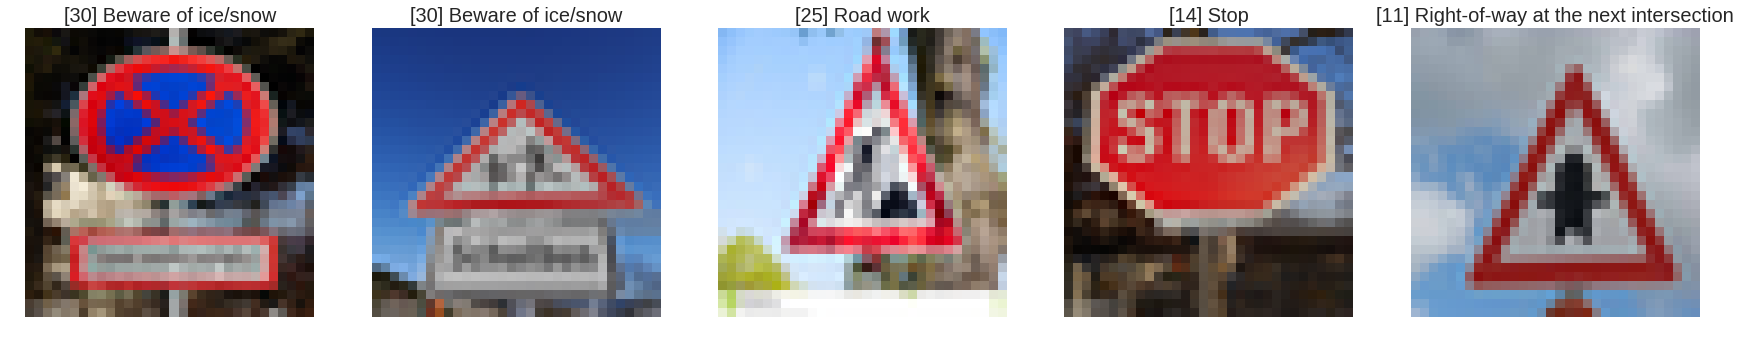

In [169]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
fig, ax = plt.subplots(ncols=5, figsize=(30, 30))

for idx, im in enumerate(test_images):    
    pred = solver.predict(test_scaler(np.asarray(im).reshape(1, 32, 32, 3)))[0]
    ax[idx].imshow(im)    
    ax[idx].axis('off')
    ax[idx].set_title('[{}] {}'.format(pred, label_dict[pred]), fontsize=20)
plt.show()

### Analyze Performance

It seems only 1 out of 5 are correct

Correct Image
* Road work
* Stop
* Right of way at the next intersection

Hence, the accuracy is $\frac{3}{5} = 60\%$

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

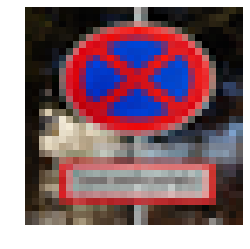

,id,name,prob
0,30,Beware of ice/snow,0.51682
1,11,Right-of-way at the next intersection,0.30631
2,20,Dangerous curve to the right,0.03778
3,17,No entry,0.03559
4,21,Doule curve,0.02348


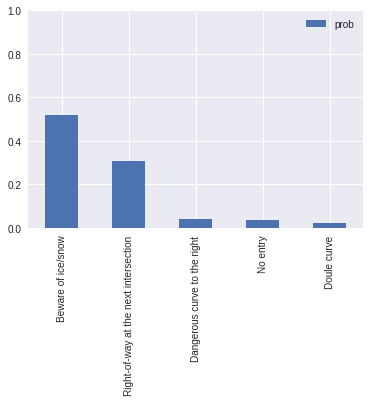

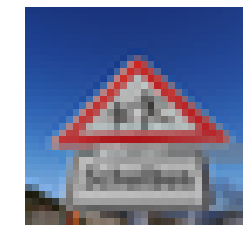

,id,name,prob
0,30,Beware of ice/snow,0.33885
1,20,Dangerous curve to the right,0.09952
2,29,Bicycles crossing,0.08085
3,25,Road work,0.07609
4,0,Speed limit (20km/h),0.07031


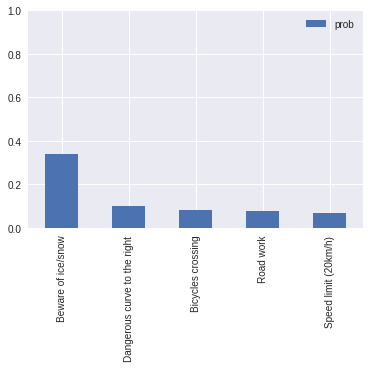

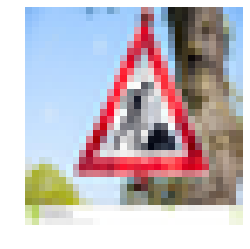

,id,name,prob
0,25,Road work,1.0
1,20,Dangerous curve to the right,0.0
2,30,Beware of ice/snow,0.0
3,36,Go straight or right,0.0
4,1,Speed limit (30km/h),0.0


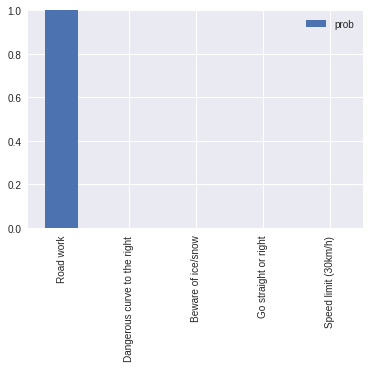

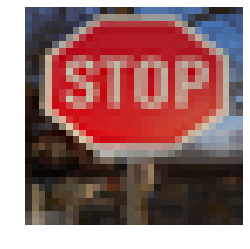

,id,name,prob
0,14,Stop,0.92779
1,17,No entry,0.06851
2,12,Priority road,0.00369
3,29,Bicycles crossing,0.00000
4,30,Beware of ice/snow,0.00000


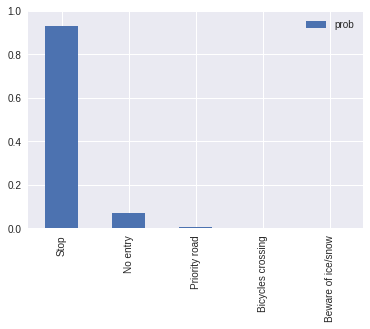

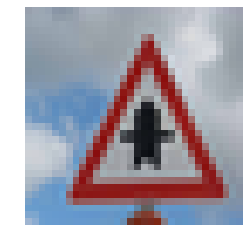

,id,name,prob
0,11,Right-of-way at the next intersection,1.0
1,30,Beware of ice/snow,0.0
2,0,Speed limit (20km/h),0.0
3,1,Speed limit (30km/h),0.0
4,2,Speed limit (50km/h),0.0


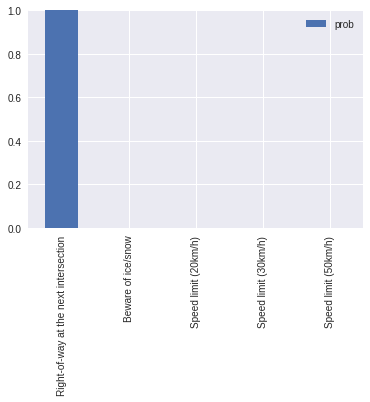

In [355]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def make_dataframe(pred):
    df = pd.DataFrame(data={"prob": pred[0].flatten(), 'id': pred[1].flatten()})
    df['name'] = df.id.map(lambda x: label_dict[x])
    return df[['id', 'name', 'prob']].round(5)

for i in test_images:
    pred = solver.predict_top_k(test_scaler(np.asarray(i).reshape(1, 32, 32, 3)), k=5)
    plt.imshow(i)
    plt.axis('off')
    plt.show()
    df = make_dataframe(pred)
    ICD.display(df)
    df.plot(x='name', y='prob', kind='bar', ylim=(0, 1))
    plt.xlabel('')
    plt.show()

### Top 5 Accuracy

The top 5 accuracy is 3 images are correct. Hence $\frac{3}{5} = 60\%$

Correct Images:
* 1st image : parking (wrong)
* 2nd image : school zone (wrong)
* **3rd image: road work (correct)**
* **4th image: stop sign (correct)**
* **5th image: right-of-way at the next intersection (correct)**

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [315]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={lenet.input : image_input, lenet.is_training: False})
    featuremaps = activation.shape[3]
    
    idx =  np.argsort(np.mean(activation.reshape(-1, featuremaps), axis=0))[::-1]
    activation = activation[..., idx]
    plt.figure(plt_num, figsize=(15,5))    
    for featuremap in range(featuremaps)[:25]:
        plt.subplot(5, 5, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        plt.axis('off')

Layer1
True Label: [27] Pedestrians


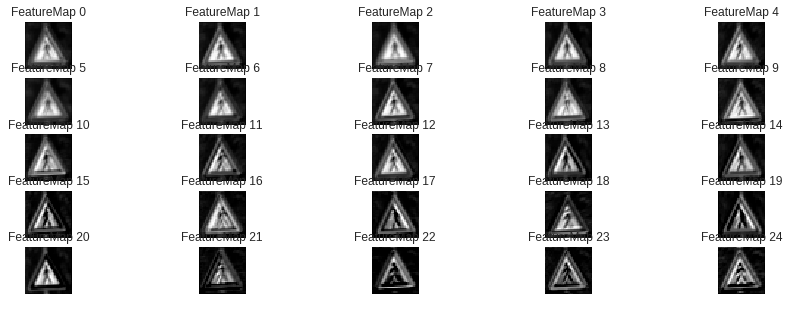

Layer2


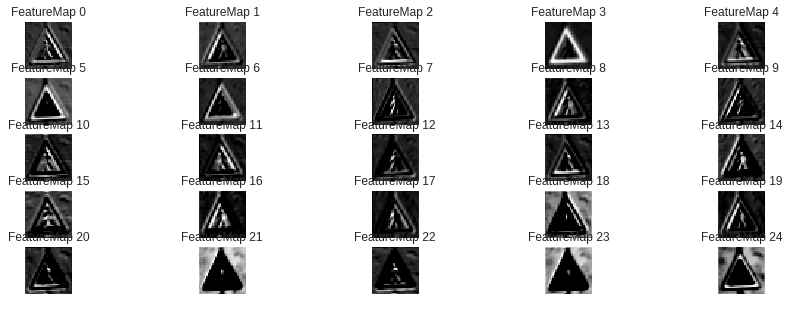

Layer3


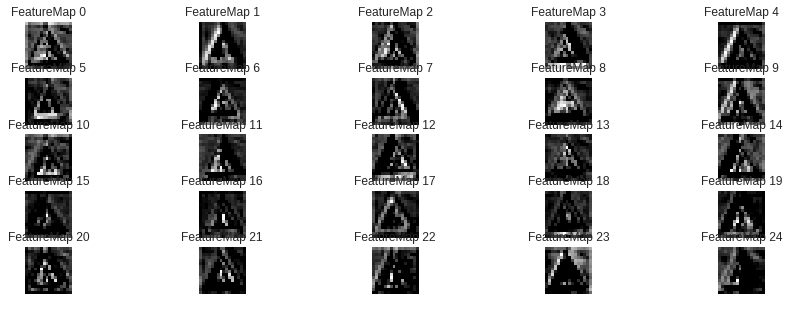

In [322]:
np.random.seed(18)
choice = np.random.choice(range(X_train.shape[0]), size=1, replace=False)

print("Layer1")
print("True Label: {} {}".format(y_train[choice], label_dict[int(y_train[choice])]))
l = 0
act = lenet.activations[l]
output_choice = scaler_pipeline(X_train[choice,...])
outputFeatureMap(output_choice, act, plt_num = 1, activation_min=0)
plt.show()

print("Layer2")
l = 1
act = lenet.activations[l]
output_choice = scaler_pipeline(X_train[choice,...])
outputFeatureMap(output_choice, act, plt_num = 2, activation_min=0)
plt.show()

print("Layer3")
l = 2
act = lenet.activations[l]
output_choice = scaler_pipeline(X_train[choice,...])
outputFeatureMap(output_choice, act, plt_num = 2, activation_min=0)
plt.show()

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** The visualization shows which portion of the pedestrian sign image has been activated after the relu layer. 

#### In the layer 1, it seems the whole sign are actiavted and the background image is blurred out
In lower level, filter only detects minimal features such as edge.

#### In the layer 2, it can be seen that it begins to detect more concrete features. For example,
In the feature map 2, the crosswalk has been activated  
In the feature map 3, we can see a triangular shape of the traffic sign.  
In the feature map 19, we can even see a human shape


In the later layer visualization, it becomes hard to understand as its image size is much smaller because of max-pooling

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 